# 주제 선정 : 경기도 반려동물 빅데이터를 이용한 현황파악 및 입지 선정

In [4]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [5]:
# plot에서 한글 폰트 설정(안 하면 한글이 깨져서 나옴)
font_name = matplotlib.font_manager.FontProperties(
        fname='c:/windows/fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)
# 한글폰트 지정 후 음수부호를 정확하게 표시하기 위해 추가할 코드
matplotlib.rcParams['axes.unicode_minus']=False

# csv가 깨져서 utf로 변환하여 다시 저장해서 꺼내 쓰는 방법을 사용했습니다.

In [6]:
# 자료 원본 불러오기
pop_data = pd.read_csv('주민등록인구집계현황.csv', encoding='euc-kr')
pet_data = pd.read_csv('반려동물등록현황.csv', encoding='euc-kr')

# utf-8로 저장
pop_data.to_csv('주민등록인구집계현황.csv', encoding='utf-8', index=None)
pet_data.to_csv('반려동물등록현황.csv', encoding='utf-8', index=None)

# 인구 자료 다시 불러오기
pop_data = pd.read_csv('주민등록인구집계현황.csv')
pet_data = pd.read_csv('반려동물등록현황.csv')

# 동물 현황

경기도에는 반려동물이 어디에 얼마나 살고 있을까?

In [36]:
pet_data.head()

,시군명,읍면동명,등록동물수(마리),(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,가평군,가평읍,941,NaN,NaN,NaN,596,294,51,NaN,85.0,NaN,3.0,2022-06-14
1,가평군,북면,289,NaN,NaN,NaN,176,93,20,NaN,185.0,NaN,0.0,2022-06-14
2,가평군,상면,399,NaN,NaN,NaN,217,153,29,NaN,243.0,NaN,0.0,2022-06-14
3,가평군,설악면,1111,NaN,NaN,NaN,446,612,53,NaN,625.0,NaN,1.0,2022-06-14
4,가평군,조종면,416,NaN,NaN,NaN,218,161,37,NaN,274.0,NaN,1.0,2022-06-14


### 여러 데이터 중 중요한 자료는 지역명들과 동물의 수, 기타 몇가지라고 판단했습니다.

In [37]:
pet = pet_data.loc[:,['시군명','읍면동명','등록동물수(마리)','등록소유자수','해당동의등록대행업체수']]
pet.head(10)

,시군명,읍면동명,등록동물수(마리),등록소유자수,해당동의등록대행업체수
0,가평군,가평읍,941,85.0,3.0
1,가평군,북면,289,185.0,0.0
2,가평군,상면,399,243.0,0.0
3,가평군,설악면,1111,625.0,1.0
4,가평군,조종면,416,274.0,1.0
5,가평군,청평면,861,594.0,2.0
6,고양시,가좌동,1354,952.0,NaN
7,고양시,강매동,63,30.0,NaN
8,고양시,고양동,1577,1182.0,NaN
9,고양시,관산동,1184,855.0,NaN


#### 또한 시군명이 읍면동 단위로 내려가면서 시군 단위에서의 동물의 수가 의미가 있다고 판단했습니다.

- 시군명 자료만 리스트로 만들어서 지역별 동물의 수를 붙여서 데이터프레임화하였습니다.

In [38]:
# town_num 이라는 변수에 시군명 중 겹치는 데이터 중 첫번째 데이터를 제외하고 모두 제거 후 인덱스 반영 없이 
# 원본 반영 안하고 리스트로 불러내기 
town_num = pet.drop_duplicates(['시군명'], keep='first', inplace=False, ignore_index=True)
town = list(town_num['시군명'])

ani_list = []
for i in town:
    ani_sum = pet[pet['시군명'].str.contains(i)]['등록동물수(마리)'].sum()
    ani_list.append([i, ani_sum])
print(ani_list)

[['가평군', 4017], ['고양시', 73477], ['과천시', 2974], ['광명시', 20161], ['광주시', 29042], ['구리시', 12381], ['군포시', 15480], ['김포시', 7912], ['남양주시', 42957], ['동두천시', 6998], ['부천시', 113892], ['성남시', 55728], ['수원시', 65330], ['시흥시', 30539], ['안산시', 86158], ['안성시', 19950], ['안양시', 35644], ['양주시', 54805], ['양평군', 13291], ['여주시', 5252], ['연천군', 2020], ['오산시', 14471], ['용인시', 50227], ['의왕시', 6590], ['의정부시', 58997], ['이천시', 13147], ['파주시', 24057], ['평택시', 60468], ['포천시', 11168], ['하남시', 17634], ['화성시', 48264]]


In [41]:
# 자료 정제
pet_df = pd.DataFrame(ani_list)
pet_df.columns = ['행정구역명', '총 동물수']
pet_sort = pet_df.sort_values(by=['총 동물수'],ascending=False)
pet_sort.head(10)

,행정구역명,총 동물수
10,부천시,113892
14,안산시,86158
1,고양시,73477
12,수원시,65330
27,평택시,60468
24,의정부시,58997
11,성남시,55728
17,양주시,54805
22,용인시,50227
30,화성시,48264


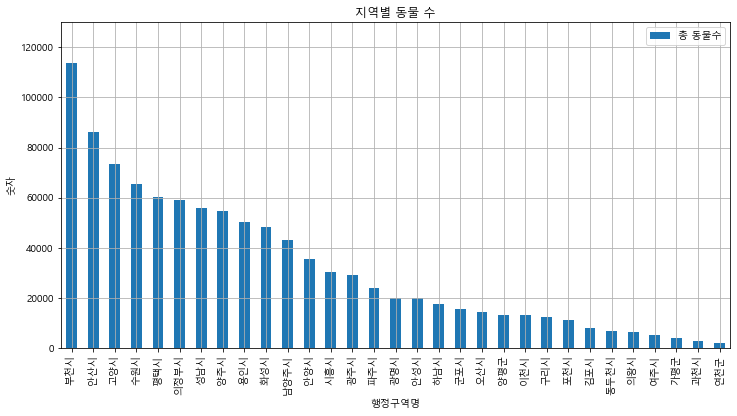

In [35]:
pet_sort.plot(x='행정구역명', y='총 동물수',kind='bar',figsize = (12,6),fontsize = (10))
plt.title("지역별 동물 수")
plt.xlabel('행정구역명')
plt.ylabel('숫자')
plt.legend(['총 동물수'])
plt.grid(True)
plt.ylim([0, 130000]) # Y축 최대 수치 13만 마리를 기준으로 그래프 작성
plt.show();


# 그렇다면 이 동물들은 얼마나 많은 사람과 살고 있을까?

In [42]:
pop_data.head()

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2022,9,도,경기도,13574353,1054380,1327378,1753988,1880750,2286448,...,646493,828547,904145,1122988,1131303,864393,435119,248574,43544,1373
1,2022,9,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,...,2175,2520,2449,3575,5177,6376,3551,2379,395,15
2,2022,9,읍면동,경기도 가평군 가평읍,19532,1062,1677,2125,1804,2649,...,784,959,845,1245,1590,1792,1013,732,117,7
3,2022,9,읍면동,경기도 가평군 북면,3821,126,177,224,231,368,...,90,82,99,164,309,507,288,206,39,1
4,2022,9,읍면동,경기도 가평군 상면,5688,153,244,512,389,560,...,111,155,171,245,543,718,384,240,44,0


### 방대한 자료에서 필요한 자료는 최신 인구수라고 판단 2022년의 9월 자료 중 행정구역 구분명이 시군인 자료들만 
### 추렸습니다.

In [59]:
popu = pop_data[(pop_data['연도']==2022) & (pop_data['월']==9) & (pop_data['행정구역구분명']=='시군')]
popu

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
1,2022,9,시군,경기도 가평군,62168,3047,4471,6009,5406,7722,...,2175,2520,2449,3575,5177,6376,3551,2379,395,15
8,2022,9,시군,경기도 고양시,1079277,76769,101359,144797,142834,175981,...,49590,70882,71693,90624,100944,67927,35157,23140,3937,114
56,2022,9,시군,경기도 과천시,78301,7252,7477,10114,11678,11865,...,3668,4833,5884,6037,6823,5019,2314,1375,323,9
63,2022,9,시군,경기도 광명시,290756,21241,29236,36023,39235,49324,...,14175,17320,19193,25074,24582,20764,9739,5302,899,26
83,2022,9,시군,경기도 광주시,388893,32763,34308,44419,55022,68394,...,16730,20789,26395,32423,32169,26827,12073,5872,1070,42
97,2022,9,시군,경기도 구리시,191011,13565,17140,25407,24761,31133,...,8355,12350,12264,15557,17728,13257,6438,3334,501,13
106,2022,9,시군,경기도 군포시,267493,18143,25052,36251,37090,42096,...,12094,17369,17597,21308,24232,18749,8356,5258,945,39
119,2022,9,시군,경기도 김포시,485609,52226,50418,51534,73073,93045,...,24751,25096,37234,44817,34193,27972,14407,7329,1329,35
134,2022,9,시군,경기도 남양주시,734642,61907,78547,85553,89129,132532,...,38089,41173,45023,66282,60538,47333,25339,13121,2299,94
153,2022,9,시군,경기도 동두천시,93260,5643,8397,10848,9843,13662,...,4162,4986,4686,6626,7799,7291,4859,3094,448,15


### 자료의 가독성을 위해 필요한 자료인 연도, 행정구역명, 총 인구수 자료로 추립니다.
### 앞에서 확보한 총 동물 수 자료와 지역명을 맞추기 위해 컬럼 자료값에서 '경기도'를 제외합니다.

In [46]:
population_df = popu.loc[:, ['연도','행정구역명','총 인구수']]
population_df['행정구역명'] = ['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', 
'동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '연천군', 
'오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시']
population_df.head(10)

,연도,행정구역명,총 인구수
1,2022,가평군,62168
8,2022,고양시,1079277
56,2022,과천시,78301
63,2022,광명시,290756
83,2022,광주시,388893
97,2022,구리시,191011
106,2022,군포시,267493
119,2022,김포시,485609
134,2022,남양주시,734642
153,2022,동두천시,93260


In [47]:
pop_sort = population_df.sort_values(by=['총 인구수'],ascending=False)
pop_sort.head()

,연도,행정구역명,총 인구수
228,2022,수원시,1188234
8,2022,고양시,1079277
432,2022,용인시,1075877
173,2022,성남시,928267
586,2022,화성시,892038


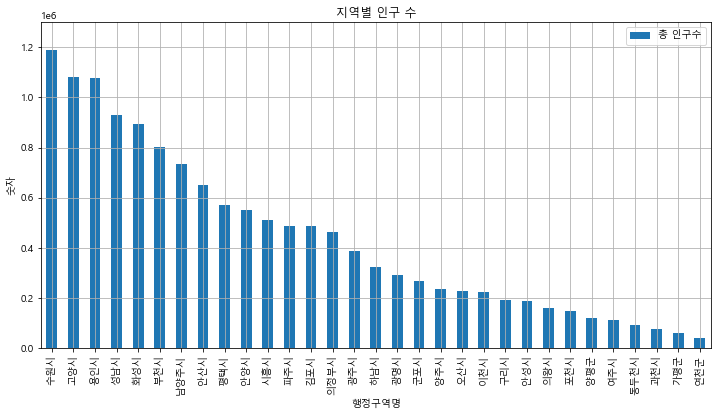

In [48]:
pop_sort.plot(x='행정구역명', y='총 인구수',kind='bar',figsize = (12,6),fontsize = (10))
plt.title("지역별 인구 수")
plt.xlabel('행정구역명')
plt.ylabel('숫자')
plt.grid(True)
plt.legend(['총 인구수'])
plt.ylim([0, 1300000]) # Y축 최대 수치 150만을 기준으로 그래프 작성
plt.show();

# 자료 병합 : 어디에 얼마나 많은 사람과 함께 많은 동물들이 살고 있는지 살펴봅시다.

In [49]:
p_a_sum = pd.merge(pet_df, population_df, how="outer")
p_a_sum.head()

,행정구역명,총 동물수,연도,총 인구수
0,가평군,4017,2022,62168
1,고양시,73477,2022,1079277
2,과천시,2974,2022,78301
3,광명시,20161,2022,290756
4,광주시,29042,2022,388893


In [50]:
# 자료 정렬
stat1 = p_a_sum.sort_values(by=['총 인구수','총 동물수'],ascending=False)
stat1.head()

,행정구역명,총 동물수,연도,총 인구수
12,수원시,65330,2022,1188234
1,고양시,73477,2022,1079277
22,용인시,50227,2022,1075877
11,성남시,55728,2022,928267
30,화성시,48264,2022,892038


In [51]:
# 가독성을 위해 컬럼 순서 변경
stat = stat1[['행정구역명','총 인구수','총 동물수']]
stat.head()

,행정구역명,총 인구수,총 동물수
12,수원시,1188234,65330
1,고양시,1079277,73477
22,용인시,1075877,50227
11,성남시,928267,55728
30,화성시,892038,48264


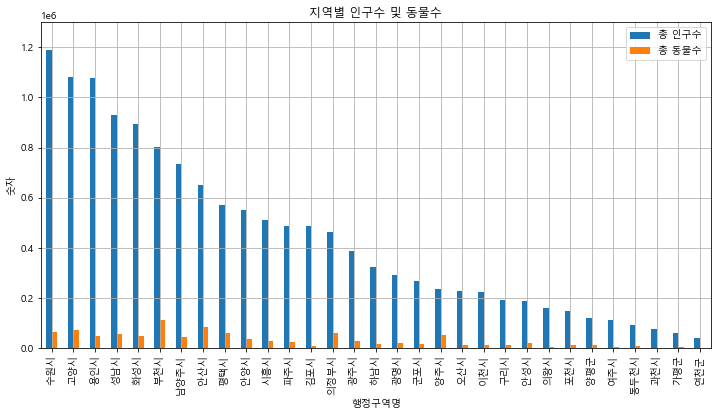

In [52]:
stat.plot(x='행정구역명',kind='bar',figsize = (12,6),fontsize = (10))
plt.title("지역별 인구수 및 동물수")
plt.xlabel('행정구역명')
plt.ylabel('숫자')
plt.grid(True)
plt.legend(['총 인구수','총 동물수'])
plt.ylim([0, 1300000]) # Y축 최대 수치 150만을 기준으로 그래프 작성
plt.show();

In [22]:
# 좀 더 용이한 자료 비교를 위해 수치 조정을 하겠습니다. (천명당 동물 마리수)

In [57]:
stat['1000명당마리수'] = (stat['총 동물수'] / stat['총 인구수'] ) * 1000
stat_rank = stat.sort_values(by=['1000명당마리수'],ascending=False)
stat_rank.head()

,행정구역명,총 인구수,총 동물수,1000명당마리수
17,양주시,236142,54805,232.084932
10,부천시,801503,113892,142.098033
14,안산시,650708,86158,132.406548
24,의정부시,464358,58997,127.050681
18,양평군,121789,13291,109.131367


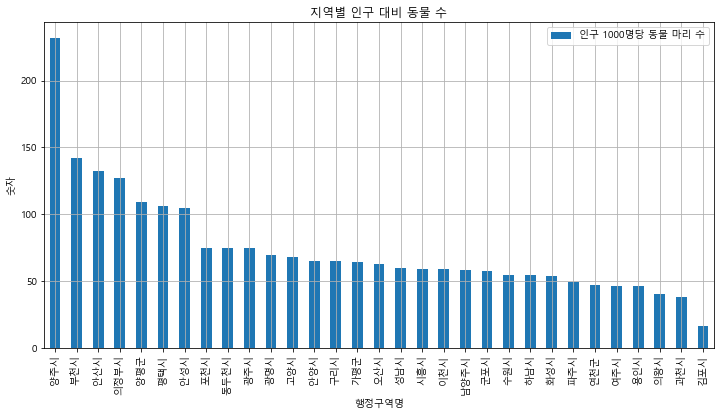

<Figure size 2160x1440 with 0 Axes>

In [58]:
aver_stat = stat_rank.loc[:,['행정구역명','1000명당마리수']]

aver_stat.plot(x='행정구역명',kind='bar',figsize = (12,6),fontsize = (10))
plt.title("지역별 인구 대비 동물 수")
plt.xlabel('행정구역명')
plt.ylabel('숫자')
plt.grid(True)
plt.legend(['인구 1000명당 동물 마리 수'])
plt.figure(figsize=(30, 20))
plt.show();